In [6]:
# dependancies, parameters, and setup
# important paper do not forget:
# https://arxiv.org/pdf/1610.02415v1.pdf
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline  

train_dir = "/home/ubuntu/Desktop/seq2seq/seq2seq_train_protein_z4/"
data_dir = "/home/ubuntu/Desktop/seq2seq/protein_data/"

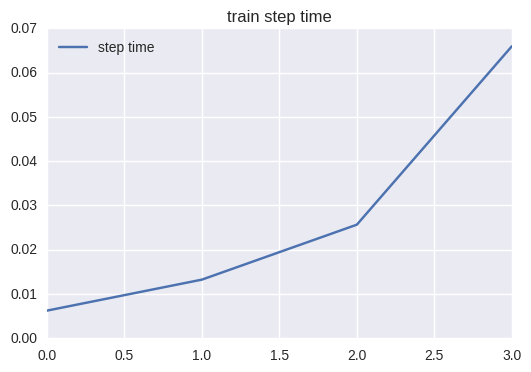

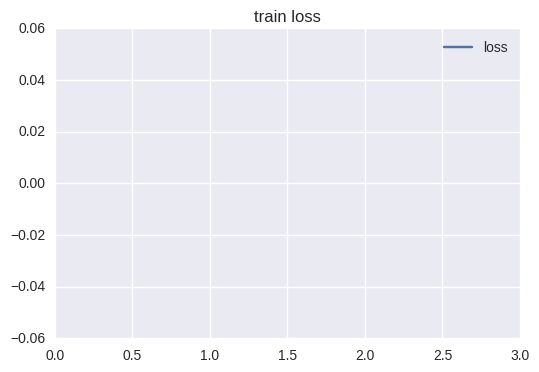

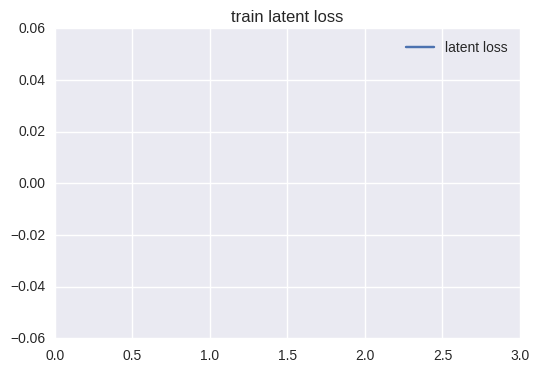

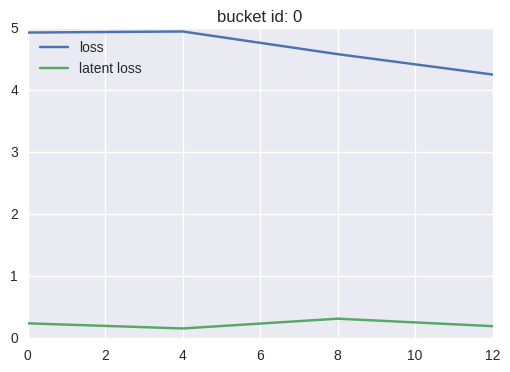

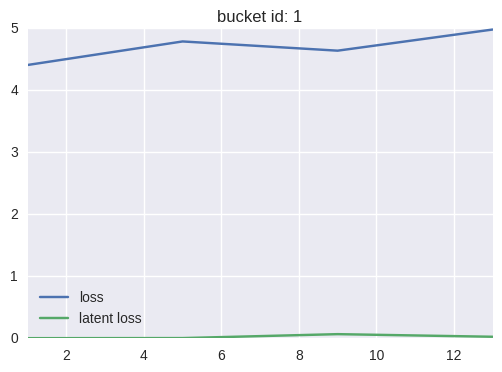

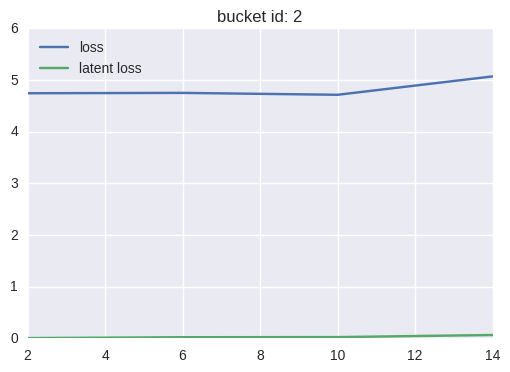

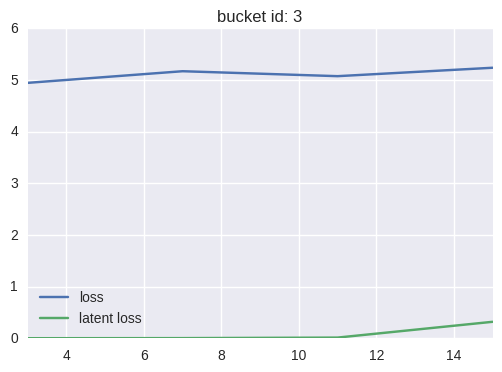

In [7]:
# error training summaries

# training error
df_train_er = pd.read_csv(train_dir + "error_train_log.txt",
                          names=["", "global step", "learning rate", "step time", "loss", "latent loss"],
                          sep=" ",
                          index_col=False
                         )
# step time
# df_train_er.plot(y=3, title="train step time")

# loss
# df_train_er.plot(y=4, title="train loss")

# latent_loss
# df_train_er.plot(y=5, title="train latent loss")

# testing error by bucket
df_test_er = pd.read_csv(train_dir + "error_test_log.txt",
                          names=["", "bucket_id", "loss", "latent loss"],
                          sep=" ",
                          index_col=False
                         )

for bucket_id in range(4):
  df_test_er[df_test_er.bucket_id == bucket_id][["loss", "latent loss"]].plot(title="bucket id: " + str(bucket_id))

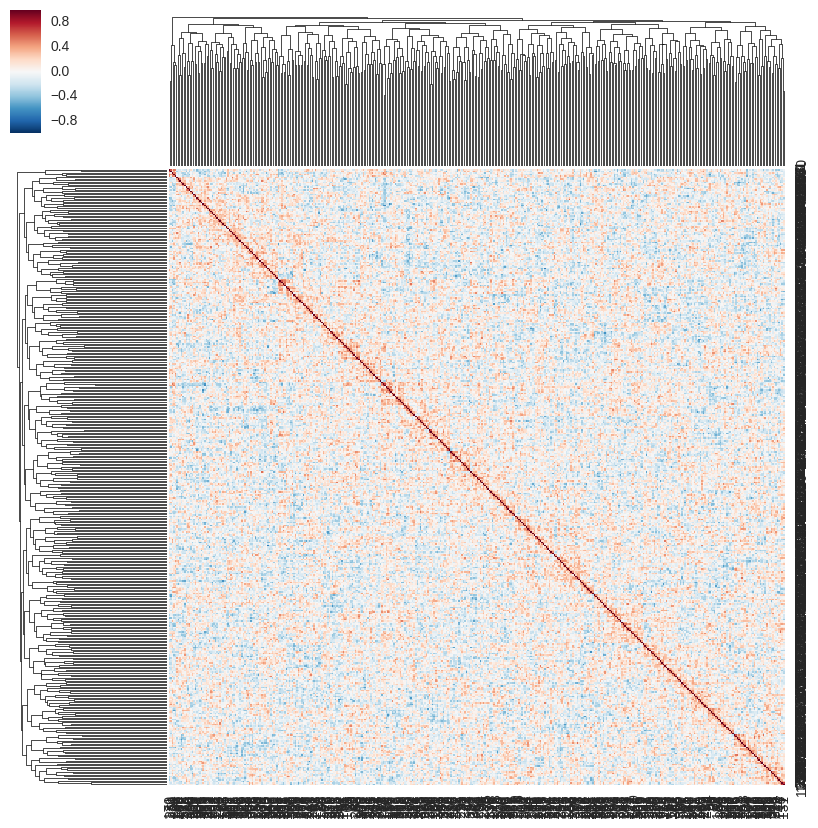

In [11]:
# visualize embeddings
latent_df = pd.read_csv(train_dir + "embedd_df_40000.txt", sep=" ")
sns.clustermap(cosine_similarity(latent_df.iloc[:,1:].values))

In [12]:
# visualize latent space distribution (by bucket)
latent_z = pd.read_csv(train_dir + "latent_z_3_40000.txt", sep=" ")
latent_z

,Unnamed: 0,0,1,2,3
0,NKKCTNCDLCEVDVSAKSCPDICIRGVIYDSKLPKKTIKMCVDKGQ...,-2.205347,1.198613,-0.432063,0.567932
1,KKEKIVNYAIQDNVISEKDADEIPIQFGNKFEMELIVEDTSLADLG...,-0.028846,0.292624,-1.080448,-0.015717
2,ATVAFRTGAGPPEALAEAIEERHVHAPASGCREAMLAAAVSEGPIS...,-0.466866,0.333595,-1.814913,0.225850
3,RPWEAPTKPKPFCNDKATCCITVDPGVKPTTCAAGCVLVVGKSRCG...,-1.423187,0.788907,0.210139,-1.194244
4,CNNKNTCCYMIKLLSSPKVCIDGCKRPVMVAPRATMKMCYNLGKPK...,0.927605,-0.155103,-0.666807,-2.542356
5,YEPITVSHGVGDDSVLGITTGRASLYLSAVIQVAMYPANVTFFEIM...,-0.461025,0.162156,-0.928060,-0.790761
6,IAFHDDEFTGEFRGVEVESGRVSAPGQGCRDWLIAADVENGEFEGC...,-1.177320,1.206290,-1.150494,-0.339441
7,LQVLDINVHDGVLQLLGEYQITKIKRAKKATLVGALFENLCADKSD...,-1.506729,1.443785,-0.876748,-0.669706
8,RGAIDFTNFEPLNITTVIDKRVYSGFGPEKVLLSDFLISDSQQGHA...,-0.990914,0.921933,0.360778,-1.024387
9,EHITDYAIQDNVIQEKDADEISIEFDEELEMALVVEDTSLADLGDD...,1.525214,-0.132542,-0.972443,-1.180436


In [13]:
# example translations
for bucket_id in range(4):
  print("Bucket " + str(bucket_id) + ": ")
  with open(train_dir + "batch_trans_40000_bucket_{}.txt".format(bucket_id)) as f_in:
    for l in f_in:
      tokens = l.strip().split(" ")
      last_tokens = [t for t in tokens[1:] if t not in ["_EOS", "_GO"]]
      s = "".join(last_tokens).replace("_UNK", "_")
      print(tokens[0] + " " + s)
  print("\n\n\n")

Bucket 0: 
0: QVRYRQCYFNPISC
0: MKSDFKFF
0: MKSDFK
0: MKSDFKFF
1: ESGINLQGDATLAN
1: MQNLRFKIKI
1: MQNLKIDAKI
1: MQNLRFKIKI
2: QGRLGTQWAVGHLM
2: MQRLRLAVAV
2: MQRLAVAV
2: MQRLRLAVAV
3: QKIQEIDLQTYLQP
3: MTEIEN_
3: MTEIEN_
3: MTEIEN_
4: PAQPFRIKKRQGPFER
4: MGKRKRSSSSSSSSSSER
4: MGSLGRSSSSSSSSSSER
4: MGGRSLERERERSSERER




Bucket 1: 
0: LT__PEMF_KFQI_NGEK_FKKLHQRR
0: MIII_EKEKEKEKNVNV
0: MIII_EKEKEKEKEKRR
0: MIII_EKEK_EKNVRR
1: EYDDMYTEKRPKVYAFGL
1: MYDLLKIKQKFSVLGLGLGLGLGLGLGLGL
1: MLDLLKIKQKFSVLGLGLGLGLGLGLGLGL
1: MQDLLKLKQKFSVLGLGLGLGLGLGLGL
2: AGNKRPIWIMGAMVNAIKDI_FVNLGANNIE
2: MCFSFSLGLGLISGLILNLGKSKS
2: MYFSFSLGLGLISGLILNLGKSKS
2: MYRTFSLGLGLISGLILNLGKSKS
3: MVKAVTVLNSSEGPHGIVYFAQEGDGPTTV
3: MGERLRLRSELRLRLRLLGALEEGSVSVSV
3: MGERLRLRSELRLRRRRLGALEEGSVSVSV
3: MGERLRLRSELRLRLRLLGALEEGSVSVSV
4: SEESNLCDLLRDYDKPAQEVIAEMTDGGVD
4: MAKIVAGSGSRFKPVAQVQV
4: MAKIVAGSGSRFKPGQQVQV
4: MAKIVAGSKPKPTLVAGQ




Bucket 2: 
0: MNIPKTCFQIHNKIQVQNYLIRINLNIFLIYHFSPIYCPYLFLFTVFFNSLINL
0: MNITITITITKIQARNR